## MLB SALARY PREDICTION USING LINEAR REGRESSION

The following uses Linear Regression to predict MLB Baseball offensive player salaries during the year 2019. I used https://www.baseball-reference.com to scrape offensive data statistics and https://www.spotrac.com to scrape offensive player salaries. In the eunsuing days, I hope to make this model better. I would also like to use this methodology to scrape pitiching salaries in order to make salary predictions for those players.

In [1]:
#import packages

from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
import pandas as pd

In [2]:
#input 2019 baseball data using beautiful soup
with urlopen('https://www.baseball-reference.com/leagues/MLB/2019.shtml') as page:
    test_html = page.read()
soup = BeautifulSoup(test_html, 'lxml')

In [3]:
#code to find URL teams.
nameList=soup.find_all(class_='left',scope="row")

In [5]:
#method to create list of teams for 2019 season

def team_list_url(name_list:str):
    team_URL=[]
    for i in range(len(name_list)-2):
        team_URL.append(nameList[i].find_all('a')[0].get('href'))
    
    return team_URL

In [1166]:
#team_list_2019 = team_list_url(nameList)

In [1167]:
#team_list_2019[1][7:-11]+'_URL'

In [9]:
#method to create list of players per team

def player_team_list(team_URL:str):
    
    player_URL=[]
    
    back_url = 'https://www.baseball-reference.com'
    
    player_team = back_url+team_URL
    
    with urlopen(player_team) as page2:
        test_html2 = page2.read()
    soup2 = BeautifulSoup(test_html2, 'lxml')
    
    roster_URL = soup2.find_all(class_='full')[2].find_all('a')[0].get('href')
    
    with urlopen(back_url+roster_URL) as roster_page:
        roster_html = roster_page.read()
    soup3 = BeautifulSoup(roster_html, 'lxml')
    
    for i in range(1,(len(soup3.find_all(id='all_appearances')[0].find_all(class_='left'))-1)):
        player_URL.append(soup3.find_all(id='all_appearances')[0].find_all(class_='left')[i].find_all('a')[0].get('href'))
    
    return player_URL
    

In [1168]:
#team_list_2019[0]

In [23]:
#players ARI
#players_ARI = player_team_list(team_list_2019[0])
#players_ARI[1]

In [214]:
#method to get player statistics for batters not pitchers:

def player_statistics(player_URL:str):
    
    back_url = 'https://www.baseball-reference.com'
    
    player = back_url+player_URL
    
    with urlopen(player) as player_team:
        test_html3 = player_team.read()
    soup3 = BeautifulSoup(test_html3, 'lxml')
    
    name = soup3.find_all('span')[8].text
 
    postion = soup3.find_all('p')[0].text[12:-4].strip()

    player_stats_dict = {}

    
    #print(soup3.find(id='batting_standard.2019'))
    
    if soup3.find(id='batting_standard.2019')!= None:
    
        for sibling in soup3.find(id='batting_standard.2019'):
            player_stats_dict[sibling.get('data-stat')]=sibling.text
            #print(sibling.get('data-stat'),sibling.text)

        year_ID = player_stats_dict['year_ID']
        age = player_stats_dict['age']
        team_ID = player_stats_dict['team_ID']
        lg_ID = player_stats_dict['lg_ID']
        G = player_stats_dict['G']
        PA = player_stats_dict['PA']
        AB = player_stats_dict['AB']
        R = player_stats_dict['R']
        H = player_stats_dict['H']
        _2B = player_stats_dict['2B']
        _3B = player_stats_dict['3B']
        HR = player_stats_dict['HR']
        RBI = player_stats_dict['RBI']
        SB = player_stats_dict['SB']
        CS = player_stats_dict['CS']
        BB = player_stats_dict['BB']
        SO = player_stats_dict['SO']
        batting_avg = player_stats_dict['batting_avg'] 
        onbase_perc = player_stats_dict['onbase_perc']
        slugging_perc = player_stats_dict['slugging_perc']
        onbase_plus_slugging = player_stats_dict['onbase_plus_slugging']
        onbase_plus_slugging_plus = player_stats_dict['onbase_plus_slugging_plus']
        TB = player_stats_dict['TB']
        GIDP = player_stats_dict['GIDP']
        HBP = player_stats_dict['HBP']
        SH = player_stats_dict['SH']
        SF = player_stats_dict['SF']
        IBB = player_stats_dict['IBB']
        pos_season = player_stats_dict['pos_season']
        award_summary = player_stats_dict['award_summary']


        headers = ['name','postion','year_ID','age','team_ID','lg_ID','G','PA','AB','R','H','_2B','_3B','HR',
               'RBI','SB','CS','BB','SO','batting_avg','onbase_perc','slugging_perc','onbase_plus_slugging',
               'onbase_plus_slugging_plus','TB','GIDP','HBP','SH','SF','IBB','pos_season','award_summary']



        player_dict = dict(zip(headers,[name,
                                        postion,
                                        year_ID,
                                        age,
                                        team_ID,
                                        lg_ID,
                                        G,
                                        PA,
                                        AB,
                                        R,
                                        H,
                                        _2B,
                                        _3B,
                                        HR,
                                        RBI,
                                        SB,
                                        CS,
                                        BB,
                                        SO,
                                        batting_avg,
                                        onbase_perc,
                                        slugging_perc,
                                        onbase_plus_slugging,
                                        onbase_plus_slugging_plus,
                                        TB,
                                        GIDP,
                                        HBP,
                                        SH,
                                        SF,
                                        IBB,
                                        pos_season,
                                        award_summary]))

        return player_dict
    
    
    #else:
        #if soup3.find(id='batting_standard.2019')== None:
            #return(' ')

In [122]:
player_list = player_team_list(team_list_2019[0])

In [230]:
def remove_none_from_player_data(player_dat:list):
    player_data_without_None = [i for i in player_data if i]
    return player_data_without_None



In [242]:
#SCRATCH WORK IN ORDER TO MAKE FINAL APPEND TABLE

import time

# starting time
start = time.time()

player_data=[]



#get team lists
team_list_2019 = team_list_url(nameList)

#get players from team
#add i here
player_list = player_team_list(team_list_2019[10])

for i in range(len(player_list)):
    player = player_list[i]
    player_dict = player_statistics(player)
    player_data.append(player_dict)
    
    

clean_player_data = remove_none_from_player_data(player_data)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
    

Runtime of the program is 13.649860858917236


In [258]:
#final Cell to aggregate final features table. 

import time

# starting time
start = time.time()

player_data=[]

#get team lists
team_list_2019 = team_list_url(nameList)

#get players from team
#add i here
#player_list = player_team_list(team_list_2019[10])

for i in range(len(team_list_2019)):
    for j in range(len(player_team_list(team_list_2019[i]))):
        player = player_team_list(team_list_2019[i])[j]
        player_dict = player_statistics(player)
        player_data.append(player_dict)
    
clean_player_data = remove_none_from_player_data(player_data)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 4157.162258863449


In [255]:
#res = [i for i in player_data if i]
#res

In [260]:
pd.DataFrame(clean_player_data)

,name,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,onbase_plus_slugging,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary
0,Nick Ahmed,Shortstop,2019,29,ARI,NL,158,625,556,79,...,.753,92,243,15,4,1,12,2,*6/H,GG
1,Abraham Almonte,Outfielder,2019,30,ARI,NL,17,38,31,11,...,.969,148,17,1,0,0,0,0,/9H8,
2,Alex Avila,Catcher and First Baseman,2019,32,ARI,NL,63,201,164,22,...,.774,100,69,8,1,0,0,7,2/H1,
3,Kevin Cron,Pinch Hitter and First Baseman,2019,26,ARI,NL,39,78,71,12,...,.790,97,37,2,2,0,1,0,H3/D5,
4,Jarrod Dyson,Centerfielder,2019,34,ARI,NL,130,452,400,65,...,.633,65,128,1,2,1,2,0,*89H7,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Andrew Stevenson,Pinch Hitter and Outfielder,2019,25,WSN,NL,30,37,30,4,...,.953,149,14,1,1,0,0,0,H/7,
690,Kurt Suzuki,Catcher,2019,35,WSN,NL,85,309,280,37,...,.809,104,136,10,6,0,3,1,2H,
691,Michael A. Taylor,Centerfielder,2019,28,WSN,NL,53,97,88,10,...,.669,72,32,0,0,2,0,0,8H/9,
692,Trea Turner,"Shortstop, Centerfielder and Second Baseman",2019,26,WSN,NL,122,569,521,96,...,.850,116,259,10,3,0,2,2,*6,


In [328]:
#'/Users/gunnuparinandi/Desktop/baseball-databank/Salaries.csv'
feature_data_frame = pd.DataFrame(clean_player_data)

In [262]:
#save final dataframe as csc
feature_data_frame.to_csv('/Users/gunnuparinandi/Desktop/baseball_batter_salaries_2019_name.csv')

In [264]:
#pickle final dataframe
feature_data_frame.to_pickle("/Users/gunnuparinandi/Desktop/baseball_batter_salaries_2019_name.pkl")

# SALARY SCRAPING PART

In [459]:
#get list of MLB team URL's from spotrac website

def salary_url(URL:str):
    with urlopen(URL) as page:
        test_html = page.read()
    soup = BeautifulSoup(test_html, 'lxml')
    
    team_list=[]
    
    for i in range (1,len(soup.find_all(class_='custom-select')[2].find_all('option'))):
        team_list.append(str(soup.find_all(class_='custom-select')[2].find_all('option')[i])[15:-14])
    
    return team_list

In [460]:
team_list_salary = salary_url('https://www.spotrac.com/mlb/rankings/salary/')

In [461]:
#team_list_salary

In [462]:
#for t in range(len(team_list_salary)):
#    print(team_list_salary[t])

In [463]:
#RIGHT METHOD TO USE

def player_salary_list(salary_list:list):
    
    base_url_salary_2019 ='https://www.spotrac.com/mlb/rankings/2019/salary/'
    
    player_list=[]
    
    player_salary={}
    
    for t in range(len(salary_list)):
        
        team_salary = base_url_salary_2019+salary_list[t]
    
        #input baseball salary data using beautiful soup
        with urlopen(team_salary) as page:
            test_html = page.read()
        soup = BeautifulSoup(test_html, 'lxml')

        i = 5
        j = 1

        while(i<=len(soup.find_all('h3'))-5 and j<=len(soup.find_all(class_='rank-value'))-1):
            #player_salary[soup.find_all('h3')[i].text]=soup.find_all(class_='rank-value')[j].text.strip()

            #player_salary['name'] = soup.find_all('h3')[i].text
            #player_salary['salary'] = soup.find_all(class_='rank-value')[j].text.strip()

            name = soup.find_all('h3')[i].text
            salary = soup.find_all(class_='rank-value')[j].text.strip()
            team = salary_list[t]

            headers = ['name','salary','team']

            player_salary = dict(zip(headers,[name,
                                            salary,
                                             team]))

            player_list.append(player_salary)

            i=i+1
            j=j+1
       
    return player_list

In [464]:
salary_dict = player_salary_list(team_list_salary)

In [465]:
final_salary_table = pd.DataFrame(salary_dict)

In [1169]:
#final_salary_table

In [801]:
final_salary_table.team.unique()

array(['arizona-diamondbacks', 'atlanta-braves', 'baltimore-orioles',
       'boston-red-sox', 'chicago-cubs', 'chicago-white-sox',
       'cincinnati-reds', 'cleveland-indians', 'colorado-rockies',
       'detroit-tigers', 'houston-astros', 'kansas-city-royal',
       'los-angeles-angels', 'los-angeles-dodgers', 'miami-marlins',
       'milwaukee-brewers', 'minnesota-twins', 'new-york-mets',
       'new-york-yankees', 'oakland-athletics', 'philadelphia-phillies',
       'pittsburgh-pirates', 'san-diego-padre', 'san-francisco-giant',
       'seattle-mariners', 'st-louis-cardinals', 'tampa-bay-ray',
       'texas-rangers', 'toronto-blue-jays', 'washington-nationals'],
      dtype=object)

In [1170]:
#final_salary_table[final_salary_table.team=='cleveland-indians']

In [467]:
#final_salary_table[final_salary_table.team=='cleveland-indians']

In [ ]:
#batter_data_no_null_salary_num_data['salary'].replace( '[\$,)]','', regex=True)

In [585]:
#remove dollars symbol from salary numbers
final_salary_table['salary'].replace( '[\$,)]','', regex=True)

0       16000000
1        7000000
2        6166666
3        6050000
4        5025000
          ...   
2110       10000
2111       10000
2112       10000
2113       10000
2114       10000
Name: salary, Length: 2115, dtype: object

In [586]:
final_salary_table['salary2'] = final_salary_table['salary'].replace( '[\$,)]','', regex=True)

In [588]:
final_salary_table.head()

,name,salary,team,salary2
0,Mike Leake,"$16,000,000",arizona-diamondbacks,16000000
1,David Peralta,"$7,000,000",arizona-diamondbacks,7000000
2,Eduardo Escobar,"$6,166,666",arizona-diamondbacks,6166666
3,Robbie Ray,"$6,050,000",arizona-diamondbacks,6050000
4,Taijuan Walker,"$5,025,000",arizona-diamondbacks,5025000


In [590]:
final_salary_table2 = final_salary_table.drop(columns=['team','salary'])

In [594]:
final_salary_table2.rename(columns={'salary2':'salary'},inplace = True)

In [595]:
final_salary_table2.head()

,name,salary
0,Mike Leake,16000000
1,David Peralta,7000000
2,Eduardo Escobar,6166666
3,Robbie Ray,6050000
4,Taijuan Walker,5025000


# MERGING FEATURE DATA FRAME TO SALARY FRAME

In [597]:
feature_data_frame.head()

,name,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary,name_no_accent
0,Nick Ahmed,Shortstop,2019,29,ARI,NL,158,625,556,79,...,92,243,15,4,1,12,2,*6/H,GG,Nick Ahmed
1,Abraham Almonte,Outfielder,2019,30,ARI,NL,17,38,31,11,...,148,17,1,0,0,0,0,/9H8,,Abraham Almonte
2,Alex Avila,Catcher and First Baseman,2019,32,ARI,NL,63,201,164,22,...,100,69,8,1,0,0,7,2/H1,,Alex Avila
3,Kevin Cron,Pinch Hitter and First Baseman,2019,26,ARI,NL,39,78,71,12,...,97,37,2,2,0,1,0,H3/D5,,Kevin Cron
4,Jarrod Dyson,Centerfielder,2019,34,ARI,NL,130,452,400,65,...,65,128,1,2,1,2,0,*89H7,,Jarrod Dyson


## REMOVE ACCENTS FROM NAME IN FEATURE DATA SET

In [472]:
name_column = feature_data_frame[['name']]

In [473]:
# courtesy of internet

import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

s = strip_accents('àéêöhello')

print (s)

aeeohello


In [474]:
name_column
#t = new[new.team_ID=='NYY'].reset_index()

,name
0,Nick Ahmed
1,Abraham Almonte
2,Alex Avila
3,Kevin Cron
4,Jarrod Dyson
...,...
689,Andrew Stevenson
690,Kurt Suzuki
691,Michael A. Taylor
692,Trea Turner


In [475]:
name_no_accent=[]
for i in range(len(name_column)):
    #print(strip_accents(t.name[i]))
    name_no_accent.append(strip_accents(name_column.name[i]))

In [476]:
feature_data_frame['name_no_accent'] = name_no_accent

In [477]:
feature_data_frame.head()

,name,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary,name_no_accent
0,Nick Ahmed,Shortstop,2019,29,ARI,NL,158,625,556,79,...,92,243,15,4,1,12,2,*6/H,GG,Nick Ahmed
1,Abraham Almonte,Outfielder,2019,30,ARI,NL,17,38,31,11,...,148,17,1,0,0,0,0,/9H8,,Abraham Almonte
2,Alex Avila,Catcher and First Baseman,2019,32,ARI,NL,63,201,164,22,...,100,69,8,1,0,0,7,2/H1,,Alex Avila
3,Kevin Cron,Pinch Hitter and First Baseman,2019,26,ARI,NL,39,78,71,12,...,97,37,2,2,0,1,0,H3/D5,,Kevin Cron
4,Jarrod Dyson,Centerfielder,2019,34,ARI,NL,130,452,400,65,...,65,128,1,2,1,2,0,*89H7,,Jarrod Dyson


In [478]:
updated_feature_data_frame = feature_data_frame.rename(columns = {'name': 'name_with_accent','name_no_accent':'name'})

In [479]:
updated_feature_data_frame.head()

,name_with_accent,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary,name
0,Nick Ahmed,Shortstop,2019,29,ARI,NL,158,625,556,79,...,92,243,15,4,1,12,2,*6/H,GG,Nick Ahmed
1,Abraham Almonte,Outfielder,2019,30,ARI,NL,17,38,31,11,...,148,17,1,0,0,0,0,/9H8,,Abraham Almonte
2,Alex Avila,Catcher and First Baseman,2019,32,ARI,NL,63,201,164,22,...,100,69,8,1,0,0,7,2/H1,,Alex Avila
3,Kevin Cron,Pinch Hitter and First Baseman,2019,26,ARI,NL,39,78,71,12,...,97,37,2,2,0,1,0,H3/D5,,Kevin Cron
4,Jarrod Dyson,Centerfielder,2019,34,ARI,NL,130,452,400,65,...,65,128,1,2,1,2,0,*89H7,,Jarrod Dyson


### FINALLY WE MERGE SALARY TO THE FEATURE DATA FRAME

In [598]:
# merge feature data table with salary data table.
final_data_frame = pd.merge(updated_feature_data_frame,final_salary_table2,on=['name'],how='left')

In [599]:
final_data_frame.head()

,name_with_accent,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary,name,salary
0,Nick Ahmed,Shortstop,2019,29,ARI,NL,158,625,556,79,...,243,15,4,1,12,2,*6/H,GG,Nick Ahmed,3662500
1,Abraham Almonte,Outfielder,2019,30,ARI,NL,17,38,31,11,...,17,1,0,0,0,0,/9H8,,Abraham Almonte,555000
2,Alex Avila,Catcher and First Baseman,2019,32,ARI,NL,63,201,164,22,...,69,8,1,0,0,7,2/H1,,Alex Avila,4250000
3,Kevin Cron,Pinch Hitter and First Baseman,2019,26,ARI,NL,39,78,71,12,...,37,2,2,0,1,0,H3/D5,,Kevin Cron,555000
4,Jarrod Dyson,Centerfielder,2019,34,ARI,NL,130,452,400,65,...,128,1,2,1,2,0,*89H7,,Jarrod Dyson,4000000


In [1171]:
#final_data_frame[final_data_frame.team_ID=='WSN']

In [601]:
# drop duplicate rows from data table.
final_data_frame_2 = final_data_frame.drop_duplicates()

In [602]:
final_data_frame_2.head()

,name_with_accent,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary,name,salary
0,Nick Ahmed,Shortstop,2019,29,ARI,NL,158,625,556,79,...,243,15,4,1,12,2,*6/H,GG,Nick Ahmed,3662500
1,Abraham Almonte,Outfielder,2019,30,ARI,NL,17,38,31,11,...,17,1,0,0,0,0,/9H8,,Abraham Almonte,555000
2,Alex Avila,Catcher and First Baseman,2019,32,ARI,NL,63,201,164,22,...,69,8,1,0,0,7,2/H1,,Alex Avila,4250000
3,Kevin Cron,Pinch Hitter and First Baseman,2019,26,ARI,NL,39,78,71,12,...,37,2,2,0,1,0,H3/D5,,Kevin Cron,555000
4,Jarrod Dyson,Centerfielder,2019,34,ARI,NL,130,452,400,65,...,128,1,2,1,2,0,*89H7,,Jarrod Dyson,4000000


In [603]:
final_data_frame_2[final_data_frame_2.team_ID=='WSN']

,name_with_accent,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary,name,salary
892,Matt Adams,"First Baseman, Pinch Hitter and Leftfielder",2019,30,WSN,NL,111,333,310,42,...,144,7,2,0,1,1,3H,,Matt Adams,3000000
893,Tres Barrera,Pinch Hitter and Catcher,2019,24,WSN,NL,2,2,2,0,...,0,0,0,0,0,0,/2H,,Tres Barrera,555000
895,Wilmer Difo,"Second Baseman, Shortstop and Third Baseman",2019,27,WSN,NL,43,144,131,15,...,41,2,0,1,0,3,6/5H4,,Wilmer Difo,581100
896,Brian Dozier,Second Baseman and Shortstop,2019,32,WSN,NL,135,482,416,54,...,179,11,4,0,1,2,*4H/1,,Brian Dozier,9000000
897,Adam Eaton,Outfielder,2019,30,WSN,NL,151,656,566,103,...,242,8,13,9,3,0,*9/7H,,Adam Eaton,8400000
898,Yan Gomes,Catcher,2019,31,WSN,NL,97,358,314,36,...,122,7,5,0,1,6,2/H3,,Yan Gomes,7083333
899,Howie Kendrick,"Second Baseman, Leftfielder and First Baseman",2019,35,WSN,NL,121,370,334,61,...,191,11,4,0,5,1,3H45/D,,Howie Kendrick,4000000
900,Carter Kieboom,Third Baseman and Shortstop,2019,21,WSN,NL,11,43,39,4,...,11,0,0,0,0,1,6/H,,Carter Kieboom,NaN
901,Jake Noll,"Pinch Hitter, First Baseman and Third Baseman",2019,25,WSN,NL,8,13,12,1,...,3,0,0,0,0,0,/H35,,Jake Noll,555000
903,Raudy Read,Pinch Hitter and Catcher,2019,25,WSN,NL,6,11,11,0,...,1,1,0,0,0,0,/2H,,Raudy Read,556000


In [604]:
#save final dataframe as csv
final_data_frame_2.to_csv('/Users/gunnuparinandi/Desktop/baseball_batter_salaries_2019_finalv2.csv')

In [605]:
#pickle final dataframe
final_data_frame_2.to_pickle("/Users/gunnuparinandi/Desktop/baseball_batter_salaries_2019_finalv2.pkl")

In [607]:
final_data_frame_2.shape

(636, 34)

In [609]:
#CHECK FOR NULL VALUES

## -- SALARY IS ONLY FEATURE WITH NULL VALUES.

#check null values
total_nulls=final_data_frame_2.isnull().sum().sort_values(ascending=False)
print("Total number of nulls for each feature:")
print(total_nulls)

Total number of nulls for each feature:
salary                       179
AB                             0
RBI                            0
HR                             0
_3B                            0
_2B                            0
H                              0
R                              0
PA                             0
name                           0
G                              0
lg_ID                          0
team_ID                        0
age                            0
year_ID                        0
postion                        0
SB                             0
CS                             0
BB                             0
SO                             0
batting_avg                    0
onbase_perc                    0
slugging_perc                  0
onbase_plus_slugging           0
onbase_plus_slugging_plus      0
TB                             0
GIDP                           0
HBP                            0
SH                             0
SF 

In [610]:
final_data_frame_2[final_data_frame_2['salary'].isnull()].index

Int64Index([ 17,  18,  21,  41,  42,  57,  60,  62,  63,  64,
            ...
            836, 838, 840, 864, 867, 871, 877, 879, 900, 914],
           dtype='int64', length=179)

In [611]:
batter_data_no_null_salary = final_data_frame_2[final_data_frame_2['salary'].notna()]

In [612]:
batter_data_no_null_salary.head()

,name_with_accent,postion,year_ID,age,team_ID,lg_ID,G,PA,AB,R,...,TB,GIDP,HBP,SH,SF,IBB,pos_season,award_summary,name,salary
0,Nick Ahmed,Shortstop,2019,29,ARI,NL,158,625,556,79,...,243,15,4,1,12,2,*6/H,GG,Nick Ahmed,3662500
1,Abraham Almonte,Outfielder,2019,30,ARI,NL,17,38,31,11,...,17,1,0,0,0,0,/9H8,,Abraham Almonte,555000
2,Alex Avila,Catcher and First Baseman,2019,32,ARI,NL,63,201,164,22,...,69,8,1,0,0,7,2/H1,,Alex Avila,4250000
3,Kevin Cron,Pinch Hitter and First Baseman,2019,26,ARI,NL,39,78,71,12,...,37,2,2,0,1,0,H3/D5,,Kevin Cron,555000
4,Jarrod Dyson,Centerfielder,2019,34,ARI,NL,130,452,400,65,...,128,1,2,1,2,0,*89H7,,Jarrod Dyson,4000000


In [613]:
batter_data_no_null_salary.shape

(457, 34)

In [614]:
batter_data_no_null_salary.columns

Index(['name_with_accent', 'postion', 'year_ID', 'age', 'team_ID', 'lg_ID',
       'G', 'PA', 'AB', 'R', 'H', '_2B', '_3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'batting_avg', 'onbase_perc', 'slugging_perc',
       'onbase_plus_slugging', 'onbase_plus_slugging_plus', 'TB', 'GIDP',
       'HBP', 'SH', 'SF', 'IBB', 'pos_season', 'award_summary', 'name',
       'salary'],
      dtype='object')

In [680]:
# check data type of each feature in the final data table. 
batter_data_no_null_salary.dtypes

name_with_accent             object
postion                      object
year_ID                      object
age                          object
team_ID                      object
lg_ID                        object
G                            object
PA                           object
AB                           object
R                            object
H                            object
_2B                          object
_3B                          object
HR                           object
RBI                          object
SB                           object
CS                           object
BB                           object
SO                           object
batting_avg                  object
onbase_perc                  object
slugging_perc                object
onbase_plus_slugging         object
onbase_plus_slugging_plus    object
TB                           object
GIDP                         object
HBP                          object
SH                          

In [676]:
#convert all data from object to floats

batter_data_no_null_salary_num_data = batter_data_no_null_salary[['G', 'PA', 'AB', 'R', 'H', '_2B', '_3B', 
                                                                  'HR', 'RBI', 'SB', 'CS', 'BB','SO', 
                                                                  'batting_avg', 'onbase_perc', 'slugging_perc',
                                                                  'onbase_plus_slugging', 'onbase_plus_slugging_plus', 
                                                                  'TB', 'GIDP','HBP', 'SH', 'SF', 'IBB','salary']].astype(float)


In [677]:
batter_data_no_null_salary_num_data

,G,PA,AB,R,H,_2B,_3B,HR,RBI,SB,...,slugging_perc,onbase_plus_slugging,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,salary
0,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,82.0,8.0,...,0.437,0.753,92.0,243.0,15.0,4.0,1.0,12.0,2.0,3662500.0
1,17.0,38.0,31.0,11.0,9.0,3.0,1.0,1.0,4.0,0.0,...,0.548,0.969,148.0,17.0,1.0,0.0,0.0,0.0,0.0,555000.0
2,63.0,201.0,164.0,22.0,34.0,8.0,0.0,9.0,24.0,1.0,...,0.421,0.774,100.0,69.0,8.0,1.0,0.0,0.0,7.0,4250000.0
3,39.0,78.0,71.0,12.0,15.0,4.0,0.0,6.0,16.0,0.0,...,0.521,0.790,97.0,37.0,2.0,2.0,0.0,1.0,0.0,555000.0
4,130.0,452.0,400.0,65.0,92.0,11.0,2.0,7.0,27.0,30.0,...,0.320,0.633,65.0,128.0,1.0,2.0,1.0,2.0,0.0,4000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,150.0,659.0,542.0,110.0,153.0,32.0,5.0,34.0,110.0,12.0,...,0.548,0.949,141.0,297.0,11.0,3.0,0.0,6.0,3.0,578300.0
912,30.0,37.0,30.0,4.0,11.0,1.0,1.0,0.0,0.0,0.0,...,0.467,0.953,149.0,14.0,1.0,1.0,0.0,0.0,0.0,559100.0
913,85.0,309.0,280.0,37.0,74.0,11.0,0.0,17.0,63.0,0.0,...,0.486,0.809,104.0,136.0,10.0,6.0,0.0,3.0,1.0,4000000.0
915,122.0,569.0,521.0,96.0,155.0,37.0,5.0,19.0,57.0,35.0,...,0.497,0.850,116.0,259.0,10.0,3.0,0.0,2.0,2.0,3725000.0


In [678]:
# check data type for updated dataset table. 
batter_data_no_null_salary_num_data.dtypes

G                            float64
PA                           float64
AB                           float64
R                            float64
H                            float64
_2B                          float64
_3B                          float64
HR                           float64
RBI                          float64
SB                           float64
CS                           float64
BB                           float64
SO                           float64
batting_avg                  float64
onbase_perc                  float64
slugging_perc                float64
onbase_plus_slugging         float64
onbase_plus_slugging_plus    float64
TB                           float64
GIDP                         float64
HBP                          float64
SH                           float64
SF                           float64
IBB                          float64
salary                       float64
dtype: object

In [1090]:
batter_data_no_null_salary_num_data.shape

(457, 25)

In [681]:
batter_data_no_null_salary_num_data.head()

,G,PA,AB,R,H,_2B,_3B,HR,RBI,SB,...,slugging_perc,onbase_plus_slugging,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,salary
0,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,82.0,8.0,...,0.437,0.753,92.0,243.0,15.0,4.0,1.0,12.0,2.0,3662500.0
1,17.0,38.0,31.0,11.0,9.0,3.0,1.0,1.0,4.0,0.0,...,0.548,0.969,148.0,17.0,1.0,0.0,0.0,0.0,0.0,555000.0
2,63.0,201.0,164.0,22.0,34.0,8.0,0.0,9.0,24.0,1.0,...,0.421,0.774,100.0,69.0,8.0,1.0,0.0,0.0,7.0,4250000.0
3,39.0,78.0,71.0,12.0,15.0,4.0,0.0,6.0,16.0,0.0,...,0.521,0.790,97.0,37.0,2.0,2.0,0.0,1.0,0.0,555000.0
4,130.0,452.0,400.0,65.0,92.0,11.0,2.0,7.0,27.0,30.0,...,0.320,0.633,65.0,128.0,1.0,2.0,1.0,2.0,0.0,4000000.0


In [682]:
batter_data_no_null_salary_num_data.describe()

,G,PA,AB,R,H,_2B,_3B,HR,RBI,SB,...,slugging_perc,onbase_plus_slugging,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,salary
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,...,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,4.570000e+02
mean,88.849015,325.689278,290.562363,42.374179,75.010941,15.317287,1.361050,12.468271,40.680525,3.925602,...,0.413751,0.725144,88.446389,130.455142,6.115974,3.628009,0.610503,2.074398,1.442013,3.963029e+06
std,47.767129,210.659636,186.871839,31.600682,53.267632,11.582370,1.735483,11.280105,31.199603,6.151143,...,0.114561,0.169354,42.849106,95.620244,5.172645,4.217955,1.359397,2.150821,2.545513,6.032447e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,45.000000,144.000000,131.000000,14.000000,29.000000,5.000000,0.000000,3.000000,13.000000,0.000000,...,0.356000,0.652000,70.000000,45.000000,2.000000,1.000000,0.000000,0.000000,0.000000,5.550000e+05
50%,93.000000,309.000000,277.000000,38.000000,69.000000,14.000000,1.000000,10.000000,37.000000,2.000000,...,0.420000,0.740000,92.000000,118.000000,5.000000,3.000000,0.000000,1.000000,1.000000,5.811000e+05
75%,132.000000,508.000000,458.000000,65.000000,116.000000,24.000000,2.000000,19.000000,62.000000,5.000000,...,0.486000,0.827000,114.000000,202.000000,10.000000,5.000000,1.000000,3.000000,2.000000,4.500000e+06
max,162.000000,747.000000,657.000000,135.000000,201.000000,54.000000,10.000000,53.000000,126.000000,46.000000,...,0.833000,1.262000,215.000000,359.000000,24.000000,27.000000,11.000000,12.000000,21.000000,3.000000e+07


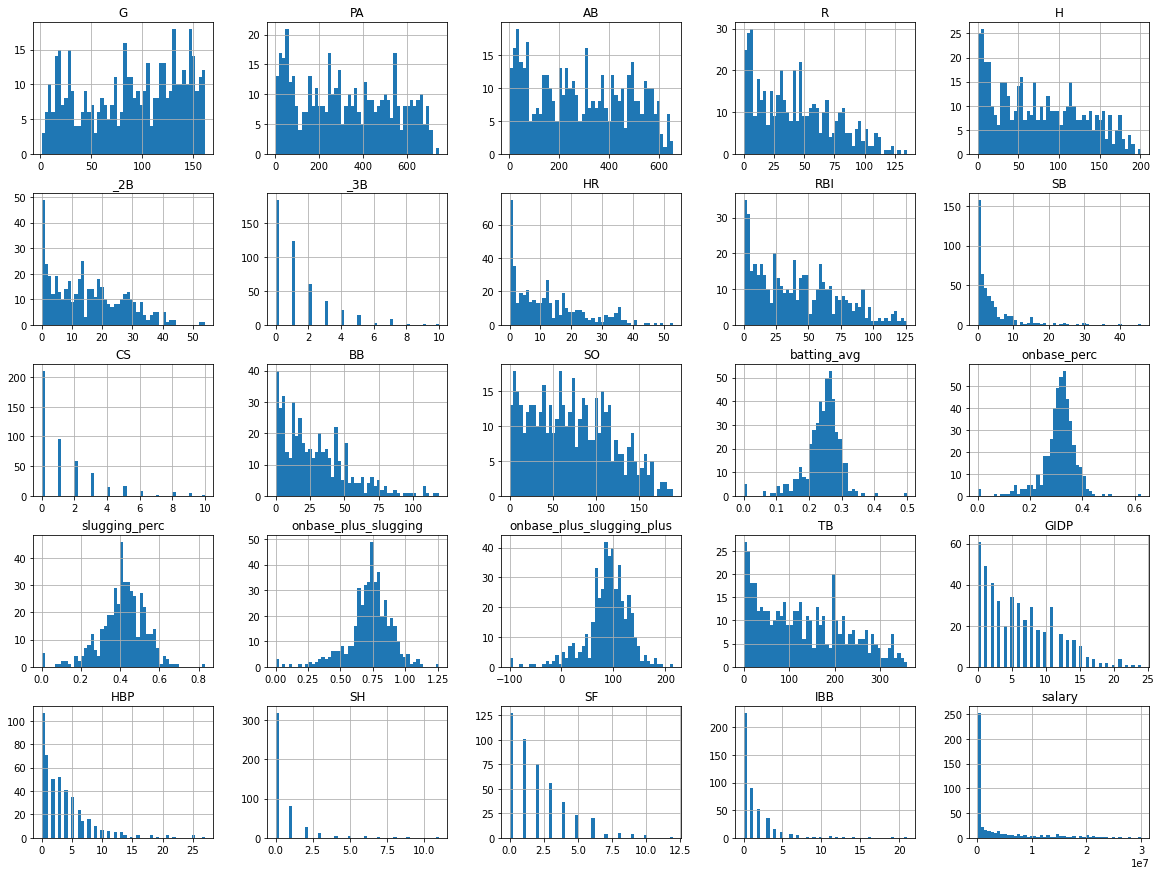

In [684]:
#histogram plots for each feature.

import numpy as np
import matplotlib.pyplot as plt
batter_data_no_null_salary_num_data.hist(bins=50,figsize=(20,15))
#batter_data_no_null_salary_num_data.hist()
plt.show()

In [688]:
# Pearson Correlatoin Matrix.
corr_matrix=batter_data_no_null_salary_num_data.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary                       1.000000
GIDP                         0.469580
BB                           0.442440
PA                           0.440711
RBI                          0.433285
AB                           0.431624
H                            0.425035
TB                           0.420867
R                            0.409012
_2B                          0.390889
G                            0.386982
HR                           0.380041
SF                           0.377563
SO                           0.315736
IBB                          0.293740
HBP                          0.223124
onbase_perc                  0.191140
onbase_plus_slugging         0.180948
onbase_plus_slugging_plus    0.175119
slugging_perc                0.160748
batting_avg                  0.156705
SB                           0.102509
CS                           0.072750
_3B                          0.061836
SH                          -0.099887
Name: salary, dtype: float64

In [693]:
# import seaborn
import seaborn as sns

,G,PA,AB,R,H,_2B,_3B,HR,RBI,SB,CS,BB,SO,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB,salary
G,1.00,0.96,0.96,0.89,0.93,0.87,0.52,0.76,0.87,0.44,0.51,0.80,0.86,0.45,0.43,0.45,0.47,0.47,0.91,0.73,0.54,0.15,0.64,0.46,0.39
PA,0.96,1.00,1.00,0.95,0.98,0.92,0.55,0.82,0.92,0.47,0.52,0.85,0.88,0.47,0.46,0.49,0.50,0.50,0.97,0.75,0.55,0.11,0.68,0.49,0.44
AB,0.96,1.00,1.00,0.95,0.98,0.93,0.56,0.81,0.92,0.47,0.53,0.81,0.87,0.48,0.44,0.48,0.49,0.49,0.97,0.75,0.53,0.12,0.67,0.47,0.43
R,0.89,0.95,0.95,1.00,0.95,0.92,0.56,0.88,0.93,0.50,0.51,0.87,0.83,0.51,0.51,0.57,0.58,0.57,0.98,0.66,0.55,0.06,0.63,0.51,0.41
H,0.93,0.98,0.98,0.95,1.00,0.94,0.58,0.81,0.92,0.48,0.52,0.79,0.81,0.55,0.49,0.53,0.54,0.54,0.98,0.74,0.51,0.10,0.67,0.48,0.43
_2B,0.87,0.92,0.93,0.92,0.94,1.00,0.55,0.76,0.88,0.46,0.51,0.76,0.77,0.52,0.46,0.53,0.53,0.52,0.94,0.68,0.49,0.05,0.64,0.46,0.39
_3B,0.52,0.55,0.56,0.56,0.58,0.55,1.00,0.34,0.45,0.57,0.54,0.40,0.45,0.32,0.26,0.27,0.28,0.27,0.55,0.23,0.29,0.22,0.37,0.16,0.06
HR,0.76,0.82,0.81,0.88,0.81,0.76,0.34,1.00,0.93,0.26,0.30,0.81,0.80,0.42,0.45,0.65,0.61,0.60,0.91,0.61,0.50,-0.11,0.55,0.54,0.38
RBI,0.87,0.92,0.92,0.93,0.92,0.88,0.45,0.93,1.00,0.33,0.38,0.82,0.82,0.48,0.47,0.61,0.59,0.58,0.97,0.72,0.51,-0.04,0.69,0.55,0.43
SB,0.44,0.47,0.47,0.50,0.48,0.46,0.57,0.26,0.33,1.00,0.71,0.35,0.41,0.25,0.21,0.17,0.20,0.19,0.43,0.19,0.29,0.27,0.26,0.18,0.10


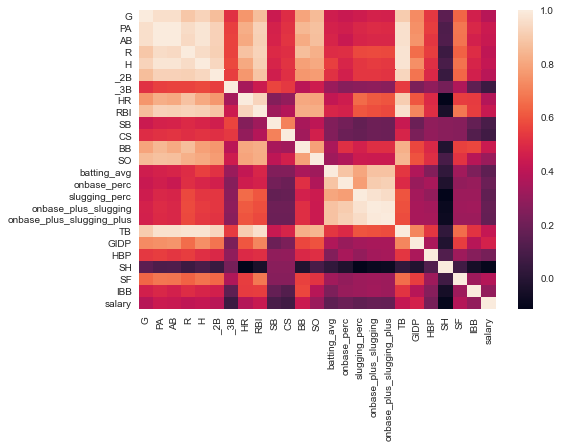

In [1172]:
# plot the heatmap

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]

sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

corr_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

## FIRST PASS AT LINEAR REGRESSION!

In [933]:
# load feature data as variable X
X = batter_data_no_null_salary_num_data.iloc[:,0:batter_data_no_null_salary_num_data.shape[1]-1]

In [934]:
X.head()

,G,PA,AB,R,H,_2B,_3B,HR,RBI,SB,...,onbase_perc,slugging_perc,onbase_plus_slugging,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB
0,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,82.0,8.0,...,0.316,0.437,0.753,92.0,243.0,15.0,4.0,1.0,12.0,2.0
1,17.0,38.0,31.0,11.0,9.0,3.0,1.0,1.0,4.0,0.0,...,0.421,0.548,0.969,148.0,17.0,1.0,0.0,0.0,0.0,0.0
2,63.0,201.0,164.0,22.0,34.0,8.0,0.0,9.0,24.0,1.0,...,0.353,0.421,0.774,100.0,69.0,8.0,1.0,0.0,0.0,7.0
3,39.0,78.0,71.0,12.0,15.0,4.0,0.0,6.0,16.0,0.0,...,0.269,0.521,0.790,97.0,37.0,2.0,2.0,0.0,1.0,0.0
4,130.0,452.0,400.0,65.0,92.0,11.0,2.0,7.0,27.0,30.0,...,0.313,0.320,0.633,65.0,128.0,1.0,2.0,1.0,2.0,0.0


In [936]:
#load salary as variable y
y = batter_data_no_null_salary_num_data.iloc[:,batter_data_no_null_salary_num_data.shape[1]-1]

In [937]:
y.head()

0    3662500.0
1     555000.0
2    4250000.0
3     555000.0
4    4000000.0
Name: salary, dtype: float64

In [1173]:
len(X.columns)
#X.shape[1]

24

## BEST SUBSET SELECTION

I got the following best subset selection method from the website below. 

https://nbviewer.jupyter.org/github/pedvide/ISLR_Python/blob/master/Chapter6_Linear_Model_Selection_and_Regularization.ipynb#6.5-Lab-1:-Subset-Selection-Methods

I would like to make this method more optimal in the future. I would also like to code the stepwise selection and backward stepwise selection methods for future use.



In [1058]:
# This is the method I got from the website stated above.

def best_subset(estimator, X, y, max_size:int, cv:int):
    from sklearn.model_selection import cross_val_score
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)
        
    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score, best_size_subset, list_scores

In [1084]:
# max size = 7, cv = 5
lm = LinearRegression()
best_subset(lm, X, y, 7, 5)

((0, 1, 6, 11, 12, 17, 19),
 0.2635255331302636,
 [(19,),
  (11, 19),
  (11, 12, 19),
  (6, 11, 12, 19),
  (1, 6, 11, 12, 19),
  (0, 1, 6, 11, 12, 19),
  (0, 1, 6, 11, 12, 17, 19)],
 [0.18738634252317515,
  0.21464966537095775,
  0.23336993577714135,
  0.23905024259380933,
  0.24558358608790024,
  0.25842657139125347,
  0.2635255331302636])

In [1089]:
best_subset2, best_score2, best_size_subset2, list_scores2 = best_subset(lm, X, y, 7, 5)

In [1088]:
# same results as the book
for subset in best_size_subset2:
    print(len(subset), X.columns[list(subset)].values)

1 ['GIDP']
2 ['BB' 'GIDP']
3 ['BB' 'SO' 'GIDP']
4 ['_3B' 'BB' 'SO' 'GIDP']
5 ['PA' '_3B' 'BB' 'SO' 'GIDP']
6 ['G' 'PA' '_3B' 'BB' 'SO' 'GIDP']
7 ['G' 'PA' '_3B' 'BB' 'SO' 'onbase_plus_slugging_plus' 'GIDP']


Using the subset selection method, we find that GIDP is the most correlated feature with Salary. This is followed by BB, SO, and _3B (triples). The reason for this was addressed in the presentation. 

### LINEAR REGRESSION USING ENTIRE DATA SET.

In [938]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [1128]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [1129]:
lin_reg.coef_

array([-6.71452864e+04,  2.07037806e+05, -1.79908488e+05, -2.10150675e+04,
        1.59291359e+05,  7.12858634e+04, -5.36994610e+05,  2.42988070e+05,
       -3.32624438e+04,  2.17906277e+03, -2.55242062e+05, -1.30234289e+05,
       -2.26062817e+04, -2.47343344e+07,  5.47873291e+08,  5.13992060e+08,
       -4.64879653e+08, -2.22295480e+05, -1.14447792e+05,  3.16517049e+05,
       -1.35881494e+05, -6.22289302e+05,  1.18826118e+05,  3.78149419e+04])

#### Using Linear Regression on the whole data set, we see that our linear regression model is overfitting.

In [1130]:
# train score
lin_reg.score(X_train,y_train)

0.37389994594582765

In [1131]:
# test score
lin_reg.score(X_test,y_test)

0.20797874333791977

In [776]:
# Hands on Machine Learning page 126.....Geron. I used this method as a pedogogical exercise to understand 
#learning curves. 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.3)
    train_errors, val_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")

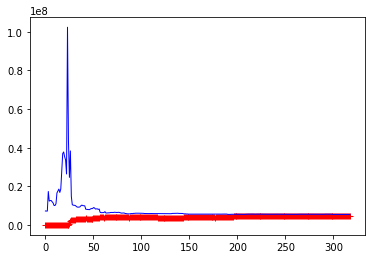

In [717]:
plot_learning_curves(lin_reg, X, y)

#### Linear Regression on the features given by Best Subset Selection.

In [1102]:
X_train_subset = X_train[['GIDP','BB','SO','_3B']]

In [1133]:
X_test_subset = X_test[['GIDP','BB','SO','_3B']]

In [1135]:
lin_reg.fit(X_train_subset,y_train)

LinearRegression()

In [1136]:
lin_reg.coef_

array([ 482010.21139694,  102787.73586659,  -25830.89617206,
       -436303.5947394 ])

In [1137]:
lin_reg.score(X_train_subset,y_train)

0.2869936023686056

In [1138]:
lin_reg.score(X_test_subset,y_test)

0.28587042873083823

Linear Regression on the "Best Subsets" gives us a perfect model that neither overfits nor underfits. I would like to extend this model using polynomial featuers of the best subsets. This is in order to improve the model's accuracy.

## LASSO REGRESSION

The following code uses Lasso Regression on the entire feature dataset. I did this to see if Lasso would tell us which features were not important. This methodology proved to be ineffective, but did tell me that AB, OBP, and TB were not of great importance in modeling. 

In [879]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [880]:
X_train_scaled = scaler.fit_transform(X_train)

In [890]:
X_test_scaled = scaler.transform(X_test)

In [891]:
#from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

In [892]:
kf = KFold(n_splits=20, shuffle=True, random_state = 30)

In [893]:
lasso_reg_CV = LassoCV(cv=kf)

In [894]:
lasso_reg_CV.fit(X_train_scaled,y_train)

/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1813978530688.0, tolerance: 1250995097880.0188
  tol, rng, random, positive)
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2694112776300.0, tolerance: 1250995097880.0188
  tol, rng, random, positive)
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3723863934577.0, tolerance: 1250995097880.0188
  tol, rng, random, positive)
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent

LassoCV(cv=KFold(n_splits=20, random_state=30, shuffle=True))

Lasso Regression did not help with the Overfitting.

In [895]:
lasso_reg_CV.score(X_train_scaled,y_train)

0.3693497820417022

In [896]:
lasso_reg_CV.score(X_test_scaled,y_test)

0.2152266780690254

In [898]:
#LASSO REGRESSION THAT GIVE FEATURES!
list(zip(X_train.columns, lasso_reg_CV.coef_))

[('G', -2705097.5515410285),
 ('PA', 4512643.6018804815),
 ('AB', 0.0),
 ('R', -124398.84305959434),
 ('H', 1777366.190014526),
 ('_2B', -239992.6589170391),
 ('_3B', -1187250.6127264134),
 ('HR', -1101379.3326954516),
 ('RBI', -670146.8137402533),
 ('SB', 6580.781930383708),
 ('CS', -488565.2376733643),
 ('BB', 1204411.543573543),
 ('SO', -867404.2237237751),
 ('batting_avg', -966529.3632433476),
 ('onbase_perc', 4239919.217356598),
 ('slugging_perc', 3928931.572800866),
 ('onbase_plus_slugging', 0.0),
 ('onbase_plus_slugging_plus', -7359558.344758738),
 ('TB', 0.0),
 ('GIDP', 1698426.8658760167),
 ('HBP', 112731.79000250567),
 ('SH', -517782.14589048433),
 ('SF', 643134.2728197194),
 ('IBB', 124084.23145958749)]

In [861]:
# alpha value given by lasso regression.
lasso_reg_CV.alpha_

12086.088084641198

## LINEAR REGRESSION USING POLYNOMIAL FEATURES

In [1143]:
from sklearn.preprocessing import PolynomialFeatures

In [1144]:
poly = PolynomialFeatures(interaction_only = True, include_bias = False)

In [1145]:
# polynomial transform X_train
#use ".fit" when you fit the model on train 
X_poly_train = poly.fit_transform(X_train)

In [1148]:
lin_reg_poly = lin_reg.fit(X_poly_train,y_train)

In [1149]:
# poly train score
lin_reg_poly.score(X_poly_train,y_train)

0.9500333498860439

In [1150]:
#polynomial transform X_test
X_poly_test = poly.transform(X_test)

In [1151]:
lin_reg_poly.score(X_poly_test, y_test)

-417.178758517607

While Polynomial Regression increased the score of the training data, the model terribly overfit and was not very good. It would have been a better idea to use polynomial regression on the best subset features, which I plan on doing. 

## LASSO REGRESSION USING POLYNOMIAL FEATURES

In [1155]:
lasso_reg_poly = lasso_reg_CV.fit(X_poly_train,y_train)

/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4131494896404.0, tolerance: 1250995097880.0188
  tol, rng, random, positive)
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6411599332342.0, tolerance: 1250995097880.0188
  tol, rng, random, positive)
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2185942340917.0, tolerance: 1250995097880.0188
  tol, rng, random, positive)
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent

In [1156]:
lasso_reg_CV.score(X_poly_train,y_train)

0.34867595650463523

In [1157]:
lasso_reg_CV.score(X_poly_test,y_test)

0.2552487809937437

Lasso Regression was not much better than Linear Regression on the whole feature data set. The model is still overfitting.

### Graph of Lasso Regression Residuals!

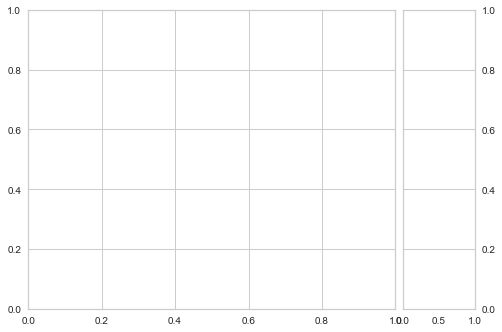

In [1158]:

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lasso_reg_CV)

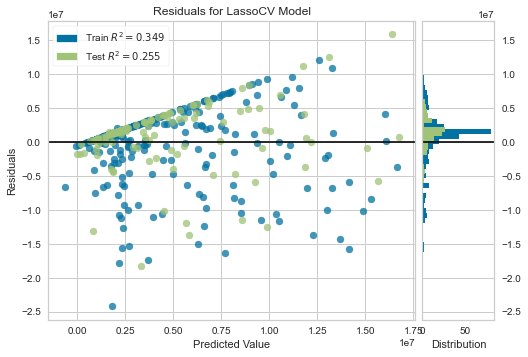

<AxesSubplot:title={'center':'Residuals for LassoCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1159]:
visualizer.fit(X_poly_train,y_train)  # Fit the training data to the visualizer
visualizer.score(X_poly_test,y_test)  # Evaluate the model on the test data
visualizer.show()              